#5-6. 규제 선형 모델 - 릿지, 라쏘, 엘라스텍넷

##5-6-1. 규제 선형 모델의 개요

- 이전까지 선형 모델의 비용 함수는 RSS를 최소화하는, 즉 실제 값과 예측값의 차이를 최소화하는 것만 고려했다.
- 그러다보니 학습 데이터에 지나치게 맞추게 되고, 회위긔 계수가 쉽게 커졌다.
- 이럴 경우 변동성이 오히려 심해져서 테스트 데이터 세트에서는 예측 성능이 저하되기 쉽다.
- 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 회소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루어야 한다.
- 비용 함수 목표: Min(RSS(W)+ alpha*||W||22)
- 여기서 알파는 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터이다.
- 알파가 0 또는 매우 작은 값이라면 비용 함수 식은 기존과 동일한 MIn(RSS(W)+0)이 될 것이다.
- 알파가 무한대 또는 매우 큰 값이라면 비용 함수 식은 RSS(W)에 비해 alpha*||W||22 값이 너무 커지게 되므로 W값을 0 또는 매우 작게 만들어야 Cost가 최소화되는 비용 함수 목표를 달성할 수 있다.
- 즉 알파 값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 알파 값을 작게 하면 회귀 계수 W의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터의 적합을 더 개선할 수 있다.
- 비용 함수의 알파 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다
- L2 규제는 W의 제곱에 대해 패널티를 부여하는 방식이고 이를 적용한 회귀를 릿지라고 한다.
- 라쏘 회귀는 W의 절댓값에 대해 패널티를 부여하는 L1 규제를 적용한다.
- L1규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환한다.


##5-6-2. 릿지 회귀
- 릿지 클래스를 통해 릿지 회귀를 구현한다.
- 릿지 클래스의 주요 생성 파라미터는 알파이며, 릿지 회귀의 알파 L2 규제 계수에 해당한다.

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Column names for the Boston dataset
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_data = pd.DataFrame(data, columns=feature_names)
y_target = pd.Series(target, name='PRICE')

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#알파=10으로 설정해 릿지 회귀 수행
ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge, X_data, y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores:',np.round(rmse_scores,3))
print('5 folds의 평균 RMSE:',np.round(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 6.0


- 앞 예제의 규제가 없는 LinearRegression의 RMSE 평균인 5.829 보다 더 뛰어난 예측 성능을 보여준다.
- 릿지의 알파 값을 0, 0.1 1, 10, 100으로 변화시키면서 RMSE와 회귀 계수 값의 변화를 살펴본다.
릿지 회귀는 알파 값이 커질수록 회귀 계수를 작게 만든다.

In [ ]:
#릿지에 사용될 알파 파라미터 값을 정의
alphas=[0,0.1,1,10,100]

#알파 리스트 값을 반복하면서 알파에 따른 평균 rmse를 구함
for alpha in alphas:
  ridge=Ridge(alpha=alpha)

  # cross_val_score를 이용해 5폴드의 평균 RMSE를 계산
  neg_mse_scores=cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha 1 일 때 5 folds의 평균 RMSE: 5.653
alpha 10 일 때 5 folds의 평균 RMSE: 5.518
alpha 100 일 때 5 folds의 평균 RMSE: 5.330


- 알파가 100일 때 평균 RMSE가 5.330으로 가장 좋다.
- 알파 값의 변화에 따른 피처 회귀 계수 값을 가로 막대 그래프로 시각화한다.
- 회귀 계수를 릿지 객체의 coef_ 속성에서 추출한 뒤에 시리즈 객체로 만들어서 시본 가로 막대 차트로 표시하고, 데이터프레임에 알파값별 회귀 계수를 저장한다.

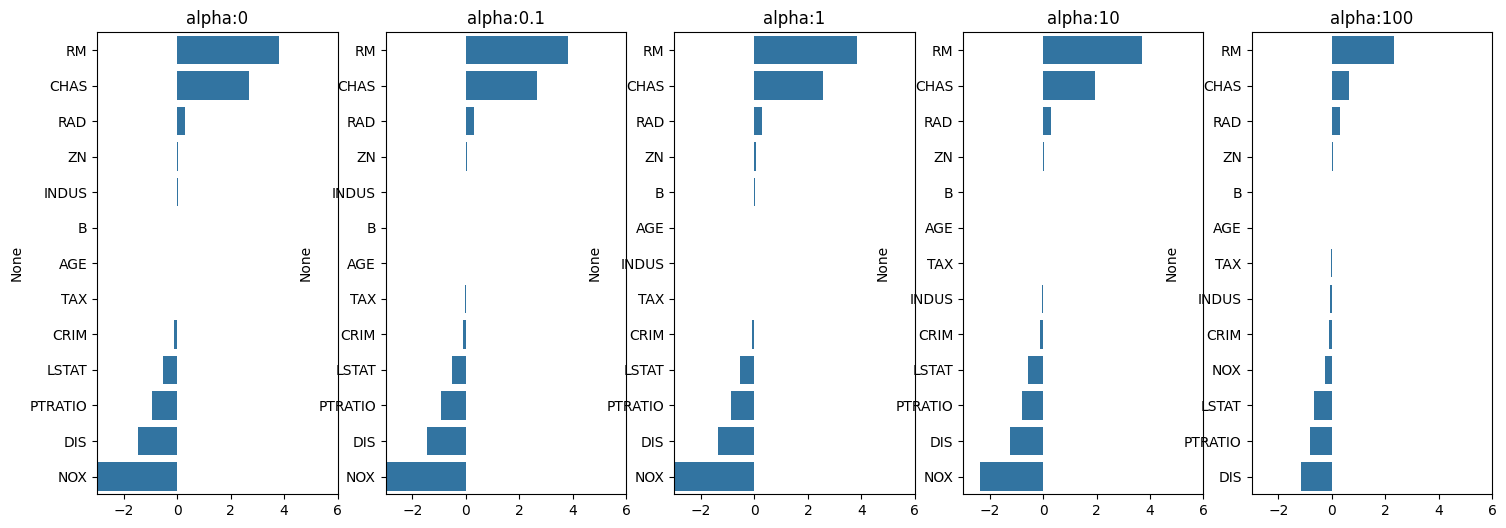

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#각 알파에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs= plt.subplots(figsize=(18,6), nrows=1, ncols=5)

#각 알파에 따른 회귀 계수 값을 데이터로 저장하기 위한 데이터프레임 생성
coeff_df=pd.DataFrame()

#알파 리스트 값을 차례로 입력해 회귀 계쑤 값 시각화 및 데이터 저장, pos는 axis 위치 지정
for pos, alpha in enumerate(alphas):
  ridge=Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)
  #알파에 따른 피처별로 회귀 계수를 시리즈로 변환하고 이를 데이터프레임의 칼럼으로 추가
  coeff=pd.Series(data=ridge.coef_,index=X_data.columns)
  colname='alpha:'+str(alpha)
  coeff_df[colname]=coeff
  #막대그래프로 각 알파 값에서 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
  coeff=coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])

#for 문 마깥에서 맷플롯립의 show 호출 및 알파에 따른 피처별 회귀 계수를 데이터프레임으로 표시
plt.show()

- 알파 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐을 알 수 있다.
- 데이터프레임에 저장된 알파 값의 변화에 따른 릿지 회귀 계수의 값을 구한다.

In [ ]:
ridge_alphas=[0,0.1,1,10,100]
sort_column='alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=True)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
DIS,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
PTRATIO,-0.952747,-0.940759,-0.876074,-0.797945,-0.829218
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
B,0.009312,0.009368,0.009673,0.010037,0.009393
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
ZN,0.046420,0.046572,0.047443,0.049579,0.054496


- 알파 값이 증가하면서 회귀 계수가 지속적으로 작아지고 있음을 알 수 있다.
- 릿지 회귀의 경우에는 회귀 계수을 0으로 만들지는 않는다

##5-6-3. 라쏘 회귀
- W의 절댓값에 패널티를 부여하는 L1규제를 선형회귀에 적용한 것이 라쏘 회귀이다.
- L1 규제는 alpha*||W||1를 의미하며, 라쏘 회귀의 비용함수 목표는 RSS(W)+alpha*||W||1 식을 최소화하는 W를 찾는 것이다.
- L2 규제가 회귀 계수의 크기를 감소시키는 데에 반해, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다.
- L1 규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가지고 있다.
- 사이킷런은 라쏘 클래스를 통해 라쏘 회귀를 구현한다.
- 라쏘 클래스릐 주요 생성 파라미터는 알파이며, 이는 라쏘 회귀의 알파 L1 규제 계수에 해당한다.
- get_linear_reg_eval()는 인자로 회귀 모델의 이름, 알파값들의 리스트, 피처 데이터 세트와 타깃 데이터 세트를 입력받아서 알파값에 따른 폴드 평균 RMSE를 출력하고, 회귀 계수값들을 데이터프레임으로 반환한다.

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

#alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 데이터프레임으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
  coeff_df=pd.DataFrame()
  if verbose: print('######', model_name, '######')
  for param in params:
    if model_name=='Ridge': model =Ridge(alpha=param)
    elif model_name=='Lasso': model=Lasso(alpha=param)
    elif model_name=='ElasticNet': model=ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores =cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param,avg_rmse))
    #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data_n, y_target_n)
    if return_coeff:
      #알파에 따른 피처별 회귀 계수를 시리즈로 변환하고 이를 데이터프레임의 칼럼으로 추가
      coeff=pd.Series(data=model.coef_, index=X_data_n.columns)
      colname='alpha:'+str(param)
      coeff_df[colname]=coeff

  return coeff_df
# end of get_linear_regre_eval


- 함수를 생성했으면 이를 이용해 알파 값의 변화에 따른 RMSE와 그떄의 회귀계수들을 출력한다.
- get_linear_reg_eval()에 모델명을 'Lasso'로 입력하면 라쏘 모델 기반으로 수행한다.

In [ ]:
#라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df=get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189


- 알파가 0.07일 때, 5.612로 가장 좋은 평균 RMSE를 보여준다.
- 알파 값에 따른 피처별 회귀 계수이다.

In [ ]:
#반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 데이터프레임 출력
sort_column='alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


- 알파의 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀌고 있다.
- 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있다.

##5-6-4. 엘라스틱넷 회귀

- 엘라스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀이다.
- 엘라스틱넷 회귀 비용 함수의 목표는 RSS(W) + alpha2 *||W||22 + alpha1*||W||1 식을 최소화하는 W를 찾는 것이다.
- 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하다.
- 알파 값에 따라 회귀 계수의 값이 급격히 변동할 수 있는데, 엘네스틱 회귀는 이를 완화하기 뒤해 L2 규제를 라쏘 회귀에 추가한 것이다.
- 단점은 L1과 L2 규제가 결합된 규제로 인해 수행 시간이 상대적으로 오래 걸린다는 것이다.
- 사이킷런은 엘라스틱넷 클래스를 이용해서 엘라스틱넷 회귀를 구현한다.
- 엘라스틱넷 클래스의 주요 생성 파라미터는 알파와 l1_ratio이다.
- 엘라스틱넷 클래스의 알파는 릿시와 라쏘 클래스의 알파 값과는 다르다.
- 엘라스틱넷의 규제는 a*L1 +b*L2로 정의도리 수 있으며, 이때 a는 l1 규제의 알파값, b는 l2 규제의 알파 값이다.
- 엘라스틱넷 클래스릐 알파 파라미터 값은 a+b이다.
- 엘라스틱넷 클래스의 l1_ratio 파라미터 값은 a/(a+b)이다.
- l1_ratio가 0이면 a가 0이므로 L2 규제와 동일하다.
- l2_ratio가 1이면 b가 0이므로 L1 규제와 동일하다.
- 엘라스틱넷 클래스를 이용해 엘라스틱넷 알파 값을 변화시키면서 RMSE와 각 피처의 회귀 계수를 출련한다.
- 앞에서 생성한 get_linear_reg_eval() 함수를 이용한다.
- get_linear_reg_eval()를 생성한 예제를 돌아보면 elif model_name == 'ElasticNet':model = ElasticNet(alpha=param, l1_ratio=0.7)으로 엘라스틱넷 객체를 생성할 때 l1_ratio를 0.7로 고정했다. 이는 단순히 알파값의 변화만 살피기 위해 l1_ratio를 미리 고정한 것이다.

In [ ]:
#엘라스틱넷에 사용도리 알파 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
#l1_ratio는 0.7로 고정
elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df=get_linear_reg_eval('ElasticNet',params=elastic_alphas,X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068


In [ ]:
#반환된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


- 알파가 0.5일 때 RMSE가 5.467로 가장 좋은 예측 성능을 보이고 있다.
- 알파 값에 따른 피처들이 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적다.
- 릿지, 라쏘, 엘라스틱넷 회귀 중 어떤 것이 가장 좋은지는 상황에 따라 다르다.
- 각각의 알고리즘에서 하이퍼 파라미터를 변경해 가면서 최적의 예측 성능을 찾아내야 한다.
- 선형 회귀의 경우 최적의 하이퍼 파리미터를 찾아내는 것 못지 않게 먼저 데이터 분포도의 정규화와 인코딩 방법이 매우 중요하다.

##5-6-5. 선형 회귀 모델을 위한 데이터 변환

- 선형 회귀 모델과 같은 선형 모델은 일반적으로 피처와 타깃 간에 선형의 관계가 있다고 가정하고, 이러한 최적의 선형함수를 찾아내 결괏값을 예측한다.
- 선형 회귀 모델은 피처값과 타깃값의 분포가 정규 분포( 즉 평균을 중심으로 종 모양으로 데이터 값이 분포된 형태) 형태를 매우 선호한다.
- 타깃값의 경우 정규 분포 형태가 아니라 특정값의 분포가 치우친 왜곡된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높다.
- 피처값 역시 결정값보다는 덜하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 수 있다.
- 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적이다.
- 스케일링/정규화 작업을 선행한다고 해서 무조건 예측 성능이 향상되는 것은 아니다.
- 일반적으로 피처 데이터 세트와 타깃 데이터 세트에 이러한 스케일링/ 정규화 작업을 수행하는 방법이 조금은 다르다.
- 사이킷런을 이용해 피처 데이터 세트에 적용하는 변환 작업
  * StandardScaler 클래스를 이용해 평균이 0이고, 분산이 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화흫 수행한다. 예측 성능을 크게 기대하기 어렵다는 단점이 있다.
  * 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환하는 방법이 있다. StandardScaler 클래스로 예측 성능 향상이 없을 경우 이 방법을 사용한다. 피처의 개수가 매우 많을 경우에는 다항 변환으로 생성되는 피처의 개수가 기하급수로 늘어나서 과적합의 이슈가 발생할 수 있다.
  * 원래 값에 로그 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포된다. 일반적으로 많이 사용된다.
- 보스턴 주택가격 피처 데이터 세트에 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그 변환을 차례로 적용한 후에 RMSE로 각 경우별 예측 성능을 측정한다.
- get_scaled_data() 함수는 method 인자로 변환 방법을 결정하여 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그 변환 중에 하나를 선택한다.
- p_degree는 다항식 특성을 수가할 때 다항식 차수가 입력된다.
- 로그 변환인 경우 예제 코드에서 np.log()가 아니라 np.log1p()를 이용한다.
- log() 함수를 적용하면 언더 플로우가 발생하기 쉬운데, 이를 예방하기 위해 인자값에 +1을 하는 방식으로 구현한 것이 np.log1p()이다.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

#method는 표준 정규 분포 변환(standard), 최댓값/최솟값 정규화(MinMax), 로그 변환(Log) 결정
#p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2 이상 부여하지 않음
def get_scaled_data(method='None', p_degree=None, input_data=None):
  if method=='Standard':
    scaled_data= StandardScaler().fit_transform(input_data)
  elif method == 'MInMax':
    scaled_data= MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data= np.log1p(input_data)
  else:
    scaled_data=input_data

  if p_degree !=None:
    scaled_data=PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

  return scaled_data

- 릿지 클래스의 알파 값을 변화시키면서 피처 데이터 세트를 여러 가지 방법으로 변환한 데이터 세트를 입력받은 경우에 RMSE 값이 어떻게 변하는지 살펴본다.
- (None, None)은 아무런 변환도 하지 않은 원본 데이터, ('Standard', None)은 표준 정규 분포, ('Standard',2) 표준 정규 분포를 다시 2차 다항식 변환, ('MInMax', None)은 최솟값/최댓값 정규화, ('MinMax',2)는 최솟값/최댓값 정규화를 다시 2차 다항식 변환, ('Log', None)은 로그 변환이다.

In [ ]:
#Ridge의 알파 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas=[0.1,1,10,100]

#5개의 방식으로 변환. 먼저 원본 그래도, 표준정규 분포, 표준정규 분포+다항식 특성
#최소/최대 정규화, 최소/최대 정규화+다항식 특성, 로그 변환
scale_methods=[(None, None),('Standard', None),('Standard',2),('MInMax', None),('MinMax',2),('Log', None)]
for scale_method in scale_methods:
  X_data_scaled=get_scaled_data(method=scale_method[0], p_degree=scale_method[1],input_data=X_data)
  print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634

## 변환 유형:MInMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 9.141
alpha 1일 때 5 폴드 세트의 평균 RMSE: 8.938
alpha 10일 때 5 폴드 세트의 평균 RMSE: 10.556
alpha 100일 때 5 폴드 세트의 평균 RMSE: 10.566

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.7

- 표준 정규 분포와 최솟값/최댓값 정규화로 피처 데이터 세트를 변경해도 성능상의 개선은 없다. 표준 정규 분포로 일차 변환 후 2차 다항식 변환을 했을 떄 알파=100에서 4.634로 성능이 개선됐으며, 최솟값/최댓값 정규화로 일차 변환 후 2차 다항식 변환을 했을 때 알파=1에서 4.323으로 성능이 개선되었다.
- 다항식 변환은 피처 개수가 많을 경우 적용하기 힘들며, 데이터 건수가 많아지면 계산에 많은 시간이 소요되어 적용에 한계가 있다.
- 로그 변환을 보면 알파가 0.1,1,10인 경우에 모두 좋은 성능 향상이 있음을 알 수 있다.
- 선형 회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우에 로그 변환을 적용하는 것이 좋은 결과를 기대할 수 있다.

#5-7. 로지스틱 회귀
- 로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘이다.
- 회귀가 선형인지 비선형인지는 독립변수가 아닌 가중치 변수가 선형인지 아닌지를 따른다.
- 로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드 함수 최적선을 갖고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다는 것이다.
- 많은 자연, 사회 현상에서 특정 변수의 확률 값은 선형이 아니라 시그모이드 함수와 같이 S자 커브의 형태를 가진다.
- 시그모이드 함수의 정의는 y= 1/(1+e의 -x승)이다.
- 시그모이드 함수는 x 값이 +,-로 아무리 커지거나 작아져도 y값은 항상 0과 1사이를 반환한다.
- x 값이 커지면 1에 근사하며 x값이 작아지면 0에 근사하고, x가 0일 때는 0.5이다.
- 사이킷런은 로지스틱 회귀를 위해서 LogisticRegression 클래스를 제공한다.
- LogisticRegression 클래스 회귀 계수 최적화는 경사 하강법 외에 다양한 최적화 방안을 선택할 수 있다.
- LogisticRegression 클래스에서 solver 파라미터의 'lbfgs', 'liblinear', 'newton-cg','sag','saga' 값을 적용해서 최적화를 선택할 수 있다.
 * lbfgs: 사이킷런 버전 0.22부터 solver의 기본 설정값이다. 메모리 공간을 절약할 수 있고, CPU 코어 수가 많다면 최적화로 병렬을 수행할 수 있다.
 * liblinear: 사이킷런 버전 0.21까지에서 solver의 기본 설정값이다. 다차원이고 작은 데이터 세트에서 효과적으로 동작하지만 국소 최적화에 이슈가 있고, 병렬로 최적화할 수 벗다.
 * newton-cg: 좀 더 정교한 최적화를 가능하게 하지만, 대용량의 데이터에서 속도가 많이 느려진다.
 * sag: Stochastic Average Gradient로서 경사 하강법 기반의 최적화를 적용한다. 대용량의 데엍에서 빠르게 최적화한다.
 * saga: sag와 유사한 최적화 방식이며 L1 정규화를 가능하게 해준다.
- 일반적으로는 lbfgs 또는 liblinear를 선택하는 것이 대부분이다.
- 사이킷런의 LogisticRegression 클래스를 이용하여 위스콘신 유방암 데이터 세트 기반에서 로지스틱 회귀로 암 여부를 판단한다.
- 사이킷런의 load_breast_cancer()를 호출해 전체 데이터 세트를 생성한다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer=load_breast_cancer()

- 선형 회귀 계열의 로지스틱 회귀는 데이터 정규 분포도에 따라 예측 성능 영향을 받을 수 있으므로 데이터에 먼저 정규 분포 형태의 표준 스케일링을 적용한 뒤에 train_tedt_split()을 이용해 데이터 세트를 분리한다.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#StandardScaler()로 평균이 0, 분산이 1로 데이터 분포도 변환
scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)

X_train , X_test, y_train, y_test=train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

- 로지스틱 회귀를 이용해 학습 및 예측을 수행하고, 정확도와 ROC-AUC 값을 구한다.
- solver 값을 'lbfgs'로 설정하고 성능을 확인한다.
- 기본 solver 값은 'lbfgs'이므로 solver 인자값을 logisticRegression() 생성자로 입력하지 않으면 자동으로 solver='lbfgs' 로 할당된다.

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용하여 학습 및 예측 수행
#solver 인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

#accuracy와 roc_auc 측정
print('{0:.3f},{1:.3f}'.format(accuracy_score(y_test, lr_preds),roc_auc_score(y_test, lr_preds_proba)))

0.977,0.995


- 서로 다른 solver 값으로 LogisticRegression을 학습하고 성능 평가를 해본다.
- 특정 solver 는 최적화에 상대적으로 많은 반복 횟수가 필요할 수 있으므로 max_iter 값을 600으로 설정한다.
- max_iter는 solver로 지정된 최적화 알고리즘이 최적 수렴할 수 있는 최대 반복 횟수이다.
- max_iter=600이면 최적화 알고리즘이 수렴할 때까지 최대 600번까지 반복하여 회귀 계수를 최적화한다.

In [ ]:
solvers= ['lbfgs','liblinear','newton-cg','sag','saga']

#여러 개의 solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
  lr_clf=LogisticRegression(solver=solver, max_iter=600)
  lr_clf.fit(X_train, y_train)
  lr_preds=lr_clf.predict(X_test)
  lr_preds_proba=lr_clf.predict_proba(X_test)[:,1]

  #accuracy와 roc_auc 측정
  print('solver:{0}, accuracy:{1:.3f}, roc_auc:{2:3f}'.format(solver, accuracy_score(y_test, lr_preds), roc_auc_score(y_test,lr_preds_proba)))

solver:lbfgs, accuracy:0.977, roc_auc:0.994709
solver:liblinear, accuracy:0.982, roc_auc:0.994709
solver:newton-cg, accuracy:0.977, roc_auc:0.994709
solver:sag, accuracy:0.982, roc_auc:0.994709
solver:saga, accuracy:0.982, roc_auc:0.994709


- liblinear와 sag, saga일 경우에 정확도가 0.982, ROC_AUC가 0.995로 lbfgs나 newton-cg 대비하여 상대적인 성능 수치가 약간 높습니다만, 데이터 세트가 워낙에 작기 때문에 개별 solver별 성능 결과의 차이는 크게 의미 있는 결과는 아니다.
- 사이킷런 LogisticRegression 클래스의 주요 하이퍼 파라미터로 penalty와 C가 있다.
- penalty는 규제의 유형을 설정하여 'l2'로 설정시 L2 규제를, 'l1'으로 설정 시 L1 규제를 뜻한다. 기본은 'l2'이다.
- C는 규제 강도를 조절하는 알파 값의 역수이다. C값이 작을수록 규제 강도가 크다.
- L1, L2 규제의 경우 solver 설정에 따라 영향을 받는다.
  * Liblinear, saga의 경우 L1, L2 규제가 모두 가능하지만, lbfgs, newton-cg, sag의 경우는 L2 규제만 가능하다.

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'solver':['liblinear','lbfgs'],'penalty':['l2','l1'], 'C':[0.01,0.1,1,5,10]}
lr_clf=LogisticRegression()

grid_clf=GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.978910


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

- FitFailedWarning 메시지가 같이 나오는데, 이는 solver가 lbfgs일 때 L1 규제를 지원하지 않음에도 GridSerchCV에서 L1규제값을 입력했기 때문에 나오는 메시지이다.
- 로지스틱 회귀는 가볍고 빠르지만, 이진 분류 예측 성능도 뛰어나기 때문에 로지스틱 회귀를 이진 분류의 기본 모델로 사용하는 경우가 많다.
- 희소한 데이터 세트 분류에도 뛰어난 성능을 보여서 텍스트 분류에도 자주 사용한다.

#5-8. 회귀 트리

- 비선형 회귀 역시 비선형 회귀 함수를 통해 결괏값을 예측한다.
- 다만 비선형 회귀는 회귀 계수의 결합이 비선형일 뿐이다.
- 트리 기반의 회귀는 회귀 트리를 이용하는 것이다.
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측을 하는 것이다.
- 리프 노드에서 예측 결정 값을 만드는 과정에 차이가 있는데, 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산한다.
- 데이터 세트의 X 피처를 결정 트리 기반으로 분할하면 X값의 균일도를 반영한 지니 계수에 따라 분할한다.
- 루트 노드를 split 0 기준으로 분할하고 이렇게 분할된 규칙 노드에서 다시 split 1과 split 2 규칙 노드로 분할한다.
- split 2는 다시 재귀적으로 split 3 규칙 노드로 트리 규칙을 변환할 수 있다.
- 리프 노드 생성 기준에 부합하는 트리 분할이 완료됐다면 리프 노드에 소속된 데이터 값의 평균갑을 구해서 최종적으로 리프 노드에 결정 값으로 할당한다.
- 결정 트리, 랜덤포레스트, GBM, XGBoost, LightGBM 등의 모든 트리 기반의 알고리즘은 분류 뿐만 아니라 회귀도 가능하다. 트리 생성이 CART 알고리즘에 기반하고 있기 때문이다.
- 사이킷런에서는 결정 트리, 랜덤포레스트, GBM에서 CART 기반의 회귀 수행을 할 수 있는 Estimator 클래스를 제공한다.
- XGBoost, LightGBM도 사이킷런 래퍼 클래스를 통해 이를 제공한다.
- 사이킷런의 랜덤 포레스트 회귀 트리인 RandomForestRegressor를 이용해 앞의 선형 회뒤에서 다룬 보스턴 주택 가격 예측을 수행한다.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the boston dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X_data = pd.DataFrame(data)
y_target = pd.Series(target, name='PRICE')

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_data.columns = feature_names
bostonDF = pd.concat([X_data, y_target], axis=1)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)

neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores : [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


- 결정 트리, GBM, XGBoost, LightGBM의 Regressor를 모두 이용해 보스턴 주택 가격 예측을 수행한다.
- get_model_cv_prediction()은 입력 모델과 데이터 세트를 입력받아 교차 검증으로 평균 RMSE를 계산해주는 함수이다.

In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores=cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error',cv=5)
  rmse_score=np.sqrt(-1*neg_mse_scores)
  avg_rmse=np.mean(rmse_score)
  print('#####',model.__class__.__name__,'#####')
  print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

- 다양한 유형의 회귀 트리를 생성한다

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg= DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg= RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg= GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg=XGBRegressor( n_estimators=1000)
lgb_reg= LGBMRegressor( n_estimators=1000)

#트리 기반의 회귀 모델을 반복하면서 평가 수행
models=[dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

- 회귀 트리 Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계수를 제공하는 coef_ 속성이 없다.
- 대신 feature_importances_를 이용해 피처별 중요도를 알 수 있다.

<Axes: xlabel='None', ylabel='None'>

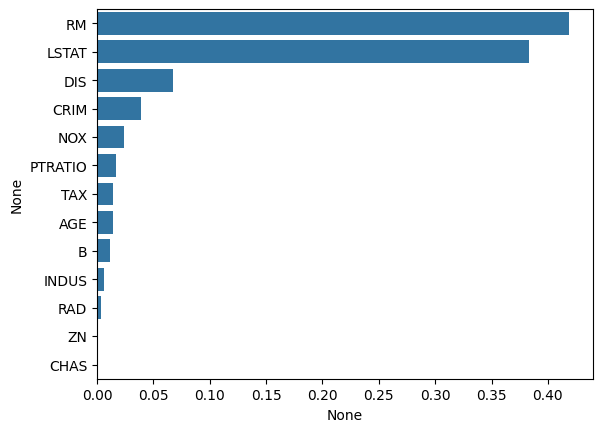

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg= RandomForestRegressor( n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습한다.
rf_reg.fit(X_data, y_target)

feature_series=pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

- 회귀 트리 Regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교하여 시각화한다.
- 결정 트리의 하이퍼 파라미터인 max_depth의 크기를 변화시키면서 어떻게 회귀 트리 예측선이 변화하는지 살펴본다.
- 보스턴 데이터 세트의 개수를 100개만 샘플링하고 RM과 PRICE 칼럼만 추출한다.
- 이는 2차원 평면상에서 X축에 독립변수인 RM, Y축에 종속변수인 PRICE만을 가지고 좀 더 직관적으로 예측값을 시각화하기 위한 것이다.

(100, 2)


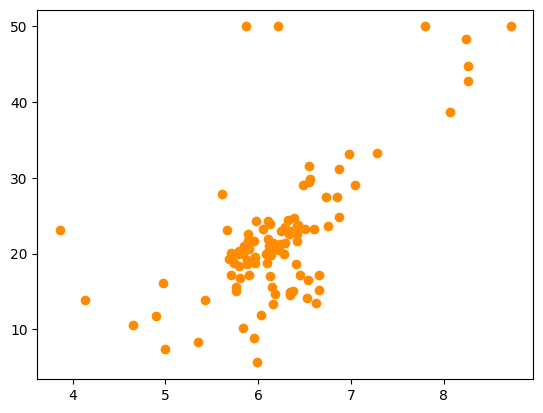

In [ ]:
bostonDF_sample=bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

- LinearRegression과 Decision를 max_depth를 각각 2, 7 로 해서 학습한다.
- 학습된 Regressor에 RM 값을 4.5~8.5까지의 100개의 테스트 데이터 세트로 제공했을 때 예측값을 구한다.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

#선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2,7
lr_reg=LinearRegression()
rf_reg2=DecisionTreeRegressor(max_depth=2)
rf_reg7=DecisionTreeRegressor(max_depth=7)

#실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성
X_test=np.arange(4.5, 8.5,0.04).reshape(-1,1)

#보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature=bostonDF_sample['RM'].values.reshape(-1,1)
y_target=bostonDF_sample['PRICE'].values.reshape(-1,1)

#학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr= lr_reg.predict(X_test)
pred_rf2= rf_reg2.predict(X_test)
pred_rf7= rf_reg7.predict(X_test)

- LinearRegression과 DecisionTreeRegression의 max_depth를 각각 2,7로 해서 학습된 Regressor에서 예측한 Price 회귀선을 그려본다.

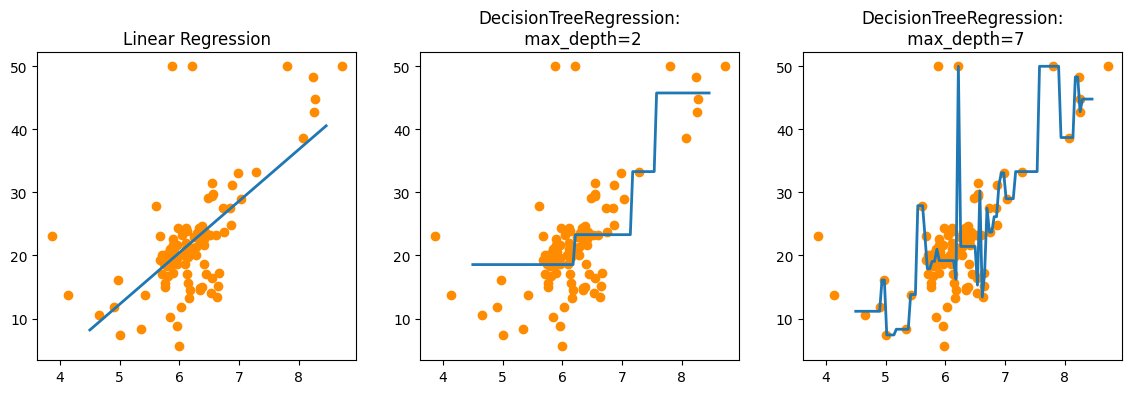

In [ ]:
fig, (ax1, ax2, ax3) =plt.subplots(figsize=(14,4),ncols=3)

#X축 값을 4.5~8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linenar', linewidth=2)

#DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('DecisionTreeRegression:\n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2)

#DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('DecisionTreeRegression:\n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)

- 선형 회귀는 직선으로 예측 회귀선을 표현하는 데 반해, 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들며 계단 형태로 만든다.
- DecisionTreeRegressor의 max_depth=7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합 되기 쉬운 모델이 되었음을 알 수 있다.